In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
heart_df = pd.read_csv("http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data",
            sep=",")

In [3]:
heart_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [5]:
heart_df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [6]:
heart_df_chd_1 = heart_df[heart_df.chd == 1]
heart_df_chd_0 = heart_df[heart_df.chd == 0]

In [7]:
heart_df_minority = resample(heart_df_chd_1, replace = True, n_samples = 302)

In [8]:
new_heart_df = pd.concat([heart_df_chd_0,heart_df_minority])

In [9]:
new_heart_df = shuffle(new_heart_df)

In [10]:
new_heart_df.chd.value_counts()

1    302
0    302
Name: chd, dtype: int64

In [11]:
new_heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 29 to 335
Data columns (total 11 columns):
row.names    604 non-null int64
sbp          604 non-null int64
tobacco      604 non-null float64
ldl          604 non-null float64
adiposity    604 non-null float64
famhist      604 non-null object
typea        604 non-null int64
obesity      604 non-null float64
alcohol      604 non-null float64
age          604 non-null int64
chd          604 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 56.6+ KB


In [12]:
X_feat = list(new_heart_df)

In [13]:
X_feat.remove('chd')

In [14]:
encoded_df = pd.get_dummies(new_heart_df[X_feat], drop_first = True)

In [15]:
encoded_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
29,30,146,0.00,6.62,25.69,60,28.07,8.23,63,0
299,301,166,4.10,4.00,34.30,32,29.51,8.23,53,1
303,305,128,0.00,8.41,28.82,60,26.86,0.00,59,1
354,356,122,1.70,5.28,32.23,51,24.08,0.00,54,1
53,54,134,8.08,1.55,17.50,56,22.65,66.65,31,1


In [16]:
X = encoded_df
Y = new_heart_df["chd"]

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [18]:
logit_chd = LogisticRegression()
logit_chd.fit(train_X, train_Y)

C:\Users\Sharang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred_y = logit_chd.predict(test_X)

In [20]:
def draw_cm(test_Y, test_X):
    cm  = metrics.confusion_matrix(test_Y, test_X, [1,0])
    sn.heatmap(cm, annot = True, fmt='.2f', xticklabels = ['chd','not chd'], yticklabels = ['chd', 'not chd'])
    plt.ylabel('True')
    plt.xlabel("Predicted")
    plt.show()

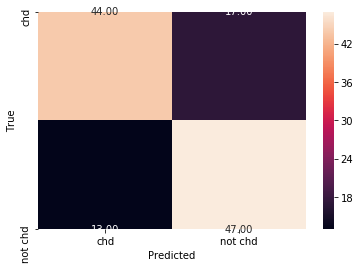

In [21]:
draw_cm(test_Y, pred_y)

In [22]:
pred_y_prob = pd.DataFrame(logit_chd.predict_proba(test_X))

In [23]:
final_pd = pd.DataFrame({"actual": test_Y})
final_pd = final_pd.reset_index()
final_pd['cd'] = pred_y_prob.iloc[:,1:2]

In [24]:
final_auc_score = metrics.roc_auc_score(final_pd.actual,final_pd.cd)
round(float(final_auc_score),2)

0.8

In [25]:
print(metrics.classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76        60
           1       0.77      0.72      0.75        61

    accuracy                           0.75       121
   macro avg       0.75      0.75      0.75       121
weighted avg       0.75      0.75      0.75       121



In [26]:
X_feat_main = list(heart_df)
X_feat_main.remove("chd")

In [27]:
encoded_df_main = pd.get_dummies(heart_df[X_feat_main], drop_first = True)

In [28]:
y = heart_df['chd']
x = encoded_df_main

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [30]:
logit = LogisticRegression()
logit.fit(train_x, train_y)

C:\Users\Sharang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred_y_  = pd.DataFrame(logit.predict_proba(test_x))
final_pd_ = pd.DataFrame({"actual": test_y})
final_pd_ = final_pd.reset_index()
final_pd_['cd'] = pred_y_prob.iloc[:,1:2]

In [32]:
final_auc_score_ = metrics.roc_auc_score(final_pd_.actual,final_pd_.cd)
round(float(final_auc_score_),2)

0.8

In [33]:
## random Forest

In [34]:
rand_f = RandomForestClassifier(max_depth=10, n_estimators = 10 )
rand_f.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
tune_para = [{'max_depth':[10,15] , "max_features":["sqrt",0.2], "n_estimators":[10,20]}]
rand_grid = GridSearchCV(rand_f, tune_para, cv = 5, scoring = 'roc_auc')
rand_grid.fit(train_X, train_Y)

C:\Users\Sharang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn

In [36]:
rand_grid.best_score_

0.8970423832058705

In [37]:
rand_grid.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 20}

In [38]:
#KNN

In [39]:
knn_df = KNeighborsClassifier()
knn_df.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
tu_df = [{"metric":["canberra", "euclidean", "minkowski"], "n_neighbors":[5,10]}]
knn_grid = GridSearchCV(knn_df, tu_df, cv=10, scoring = 'roc_auc')
knn_grid.fit(train_X,train_Y)

C:\Users\Sharang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': [5, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [41]:
knn_grid.best_score_

0.7235231193926845

In [42]:
knn_grid.best_params_

{'metric': 'canberra', 'n_neighbors': 10}